In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np


In [9]:
import seaborn as sns

In [11]:
df = pd.read_csv('Cleaned_Amazon.csv',parse_dates=['Date'])

In [13]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,easy ship
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,easy ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False,easy ship
128972,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False,easy ship
128973,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False,easy ship
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False,easy ship


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128976 non-null  object        
 1   Date                128976 non-null  datetime64[ns]
 2   Status              128976 non-null  object        
 3   Fulfilment          128976 non-null  object        
 4   Sales Channel       128976 non-null  object        
 5   ship-service-level  128976 non-null  object        
 6   Category            128976 non-null  object        
 7   Size                128976 non-null  object        
 8   Courier Status      128976 non-null  object        
 9   Qty                 128976 non-null  int64         
 10  currency            128976 non-null  object        
 11  Amount              128976 non-null  float64       
 12  ship-city           128976 non-null  object        
 13  ship-state          128976 no

In [207]:
df['Date'].dtypes

dtype('<M8[ns]')

In [43]:
#  SALES OVERVIEW

In [21]:
# 1. What are the total sales over time?

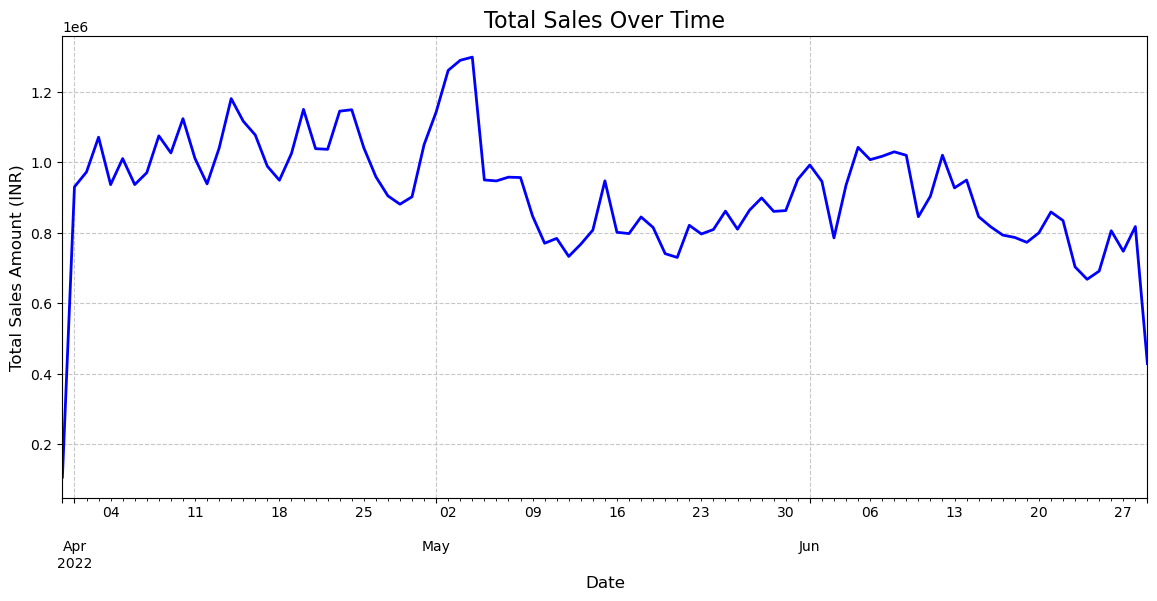

In [15]:
# Total sales over time
sales_over_time = df.groupby('Date')['Amount'].sum()

# Plotting the time series
plt.figure(figsize=(14, 6))
sales_over_time.plot(kind='line', color='blue', linewidth=2)
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [23]:
# Group by category and calculate total quantity sold in May
quantity_sales_may = df_may.groupby('Category')['Qty'].sum().reset_index()

# Sort by quantity sold
quantity_sales_may = quantity_sales_may.sort_values(by='Qty', ascending=False)

# Display the quantity sold by category in May
print(quantity_sales_may)


   Category    Qty
5   T-shirt  14406
2     Shirt  13550
0   Blazzer   5408
6  Trousers   3764
1   Perfume    411
7    Wallet    293
4     Socks    126
3     Shoes     53


In [35]:
# 2. What are the monthly sales trends?

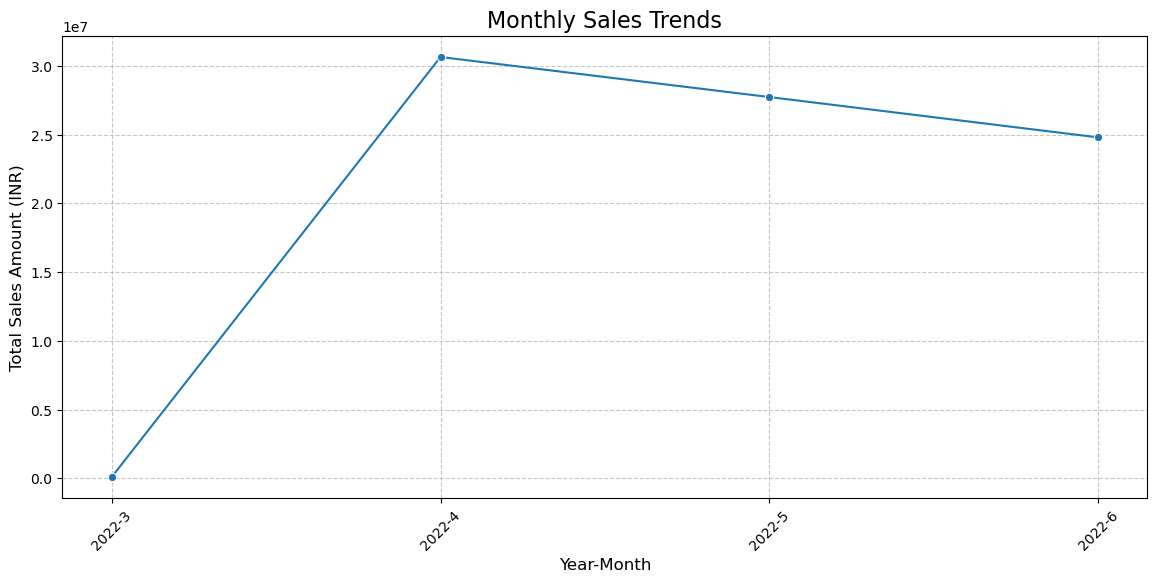

In [37]:
# Extract month and year from the date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year
monthly_sales = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Create a combined column for better visualization
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# Plotting monthly sales trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Amount', marker='o')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [29]:
# Filter data for May
df_may = df[df['Date'].dt.month == 4]

# Group by category and calculate total sales in May
category_sales_may = df_may.groupby('Category')['Amount'].sum().reset_index()

# Sort the categories by sales
category_sales_may = category_sales_may.sort_values(by='Amount', ascending=False)

# Display the top-performing categories in May
print(category_sales_may)


   Category       Amount
5   T-shirt  16307908.18
2     Shirt   8767988.86
0   Blazzer   3057491.94
6  Trousers   1924447.22
1   Perfume    261573.65
7    Wallet    207683.21
4     Socks     68842.97
3     Shoes     57684.24


In [31]:
# Group by size and calculate total sales in May
size_sales_may = df_may.groupby('Size')['Amount'].sum().reset_index()

# Sort by total sales amount
size_sales_may = size_sales_may.sort_values(by='Amount', ascending=False)

# Display the size-wise sales for May
print(size_sales_may)

    Size      Amount
6      M  5401618.71
5      L  5179313.32
8     XL  4698423.87
7      S  4291454.81
10   XXL  3994550.34
0    3XL  3486589.04
9     XS  2888649.59
4   Free   526941.10
3    6XL    69441.96
2    5XL    64229.14
1    4XL    52408.39


In [55]:
df.describe()

,Date,Qty,Amount,ship-postal-code,Month,Year
count,128976,128976.000000,128976.000000,128976.000000,128976.000000,128976.0
mean,2022-05-12 11:49:26.951991040,0.904401,645.927694,463874.404300,4.909185,2022.0
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000,3.000000,2022.0
25%,2022-04-20 00:00:00,1.000000,459.000000,382421.000000,4.000000,2022.0
50%,2022-05-10 00:00:00,1.000000,605.000000,500033.000000,5.000000,2022.0
75%,2022-06-04 00:00:00,1.000000,771.000000,600024.000000,6.000000,2022.0
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000,6.000000,2022.0
std,NaN,0.313368,272.747592,191481.383425,0.818403,0.0


In [57]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976
unique,120229,13,2,2,2,9,11,4,1,8948,69,1,2
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,easy ship
freq,12,77815,89713,128852,88630,50292,22373,109486,128976,11243,22307,128976,89713


# Product Analysis

# 1. What are the top-selling product categories?

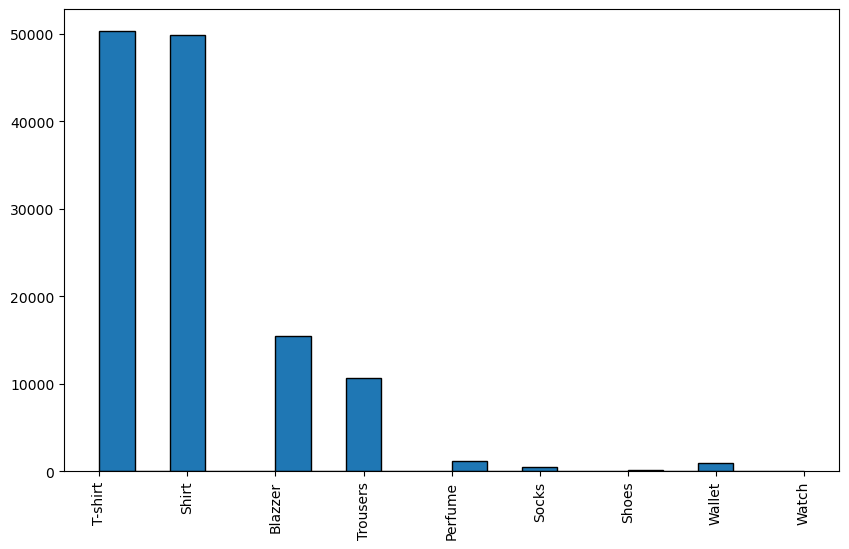

In [167]:
df['Category'] = df['Category'].astype(str)
c_d =df['Category']
plt.figure(figsize=(10,6))
plt.hist(c_d,bins=20,edgecolor='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# most of the buyers are t-shirt

# 2.sizes available for each category

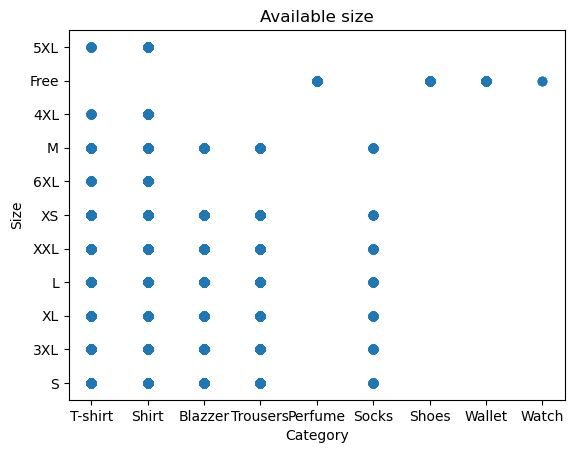

In [169]:

# scatter plot
x_data =df['Category']
y_data =df['Size']

plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Available size')
plt.show()

# 3. Which product sizes are most commonly sold?

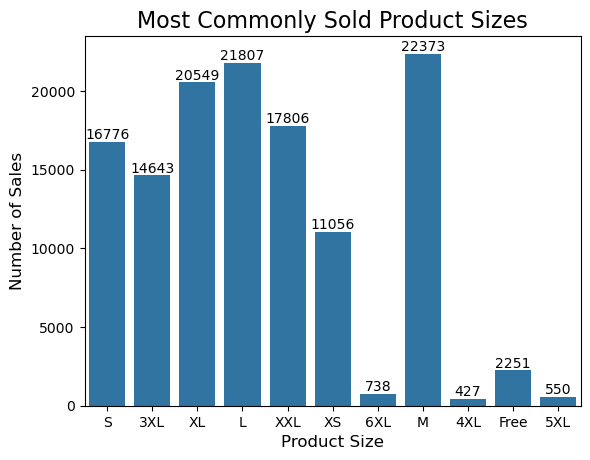

In [157]:
ax =sns.countplot(x='Size',data=df)
plt.title('Most Commonly Sold Product Sizes', fontsize=16)
plt.xlabel('Product Size', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
#checking for data labels
for bars in ax.containers:
    ax.bar_label(bars)

In [65]:
# Most of the people buys M-size

# 4.Courier Status

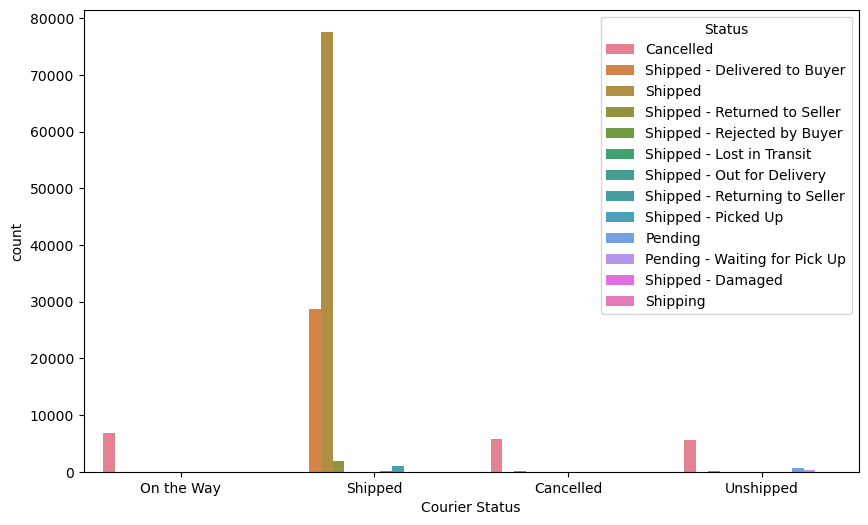

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Courier Status',hue='Status')
plt.show()

# 5. Which order statuses contribute most to total sales?

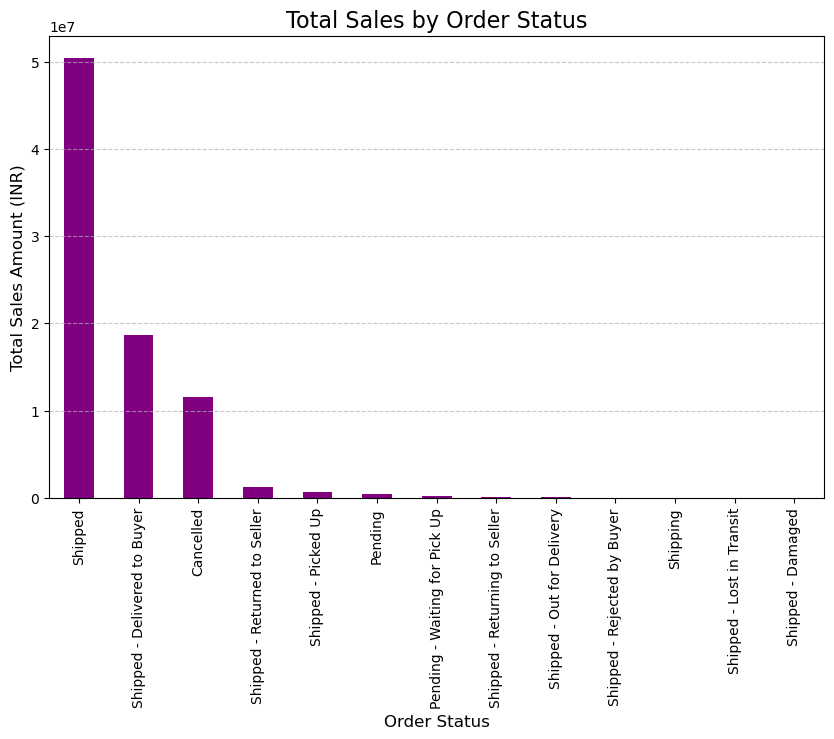

In [163]:
# Sales amount by order status
status_sales = df.groupby('Status')['Amount'].sum().sort_values(ascending=False)

# Plotting the sales by order status
plt.figure(figsize=(10, 6))
status_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128976 non-null  object        
 1   Date                128976 non-null  datetime64[ns]
 2   Status              128976 non-null  object        
 3   Fulfilment          128976 non-null  object        
 4   Sales Channel       128976 non-null  object        
 5   ship-service-level  128976 non-null  object        
 6   Category            128976 non-null  object        
 7   Size                128976 non-null  object        
 8   Courier Status      128976 non-null  object        
 9   Qty                 128976 non-null  int64         
 10  currency            128976 non-null  object        
 11  Amount              128976 non-null  float64       
 12  ship-city           128976 non-null  object        
 13  ship-state          128976 no

<!-- maximum 99.3% of buyers are retailers and 0.7% are wholesalers -->

# Geographical Analysis

In [117]:
#7.state wise ship date

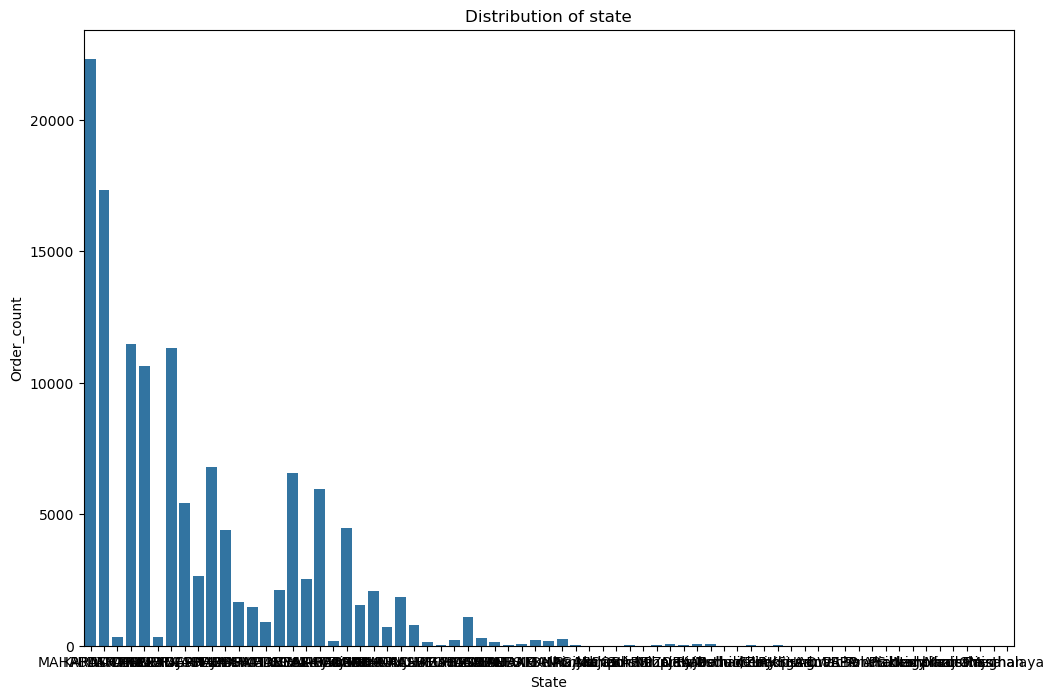

In [119]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="ship-state")
plt.xlabel('State')
plt.ylabel('Order_count')
plt.title('Distribution of state')
plt.show()

In [121]:
# 8.Top 10 states

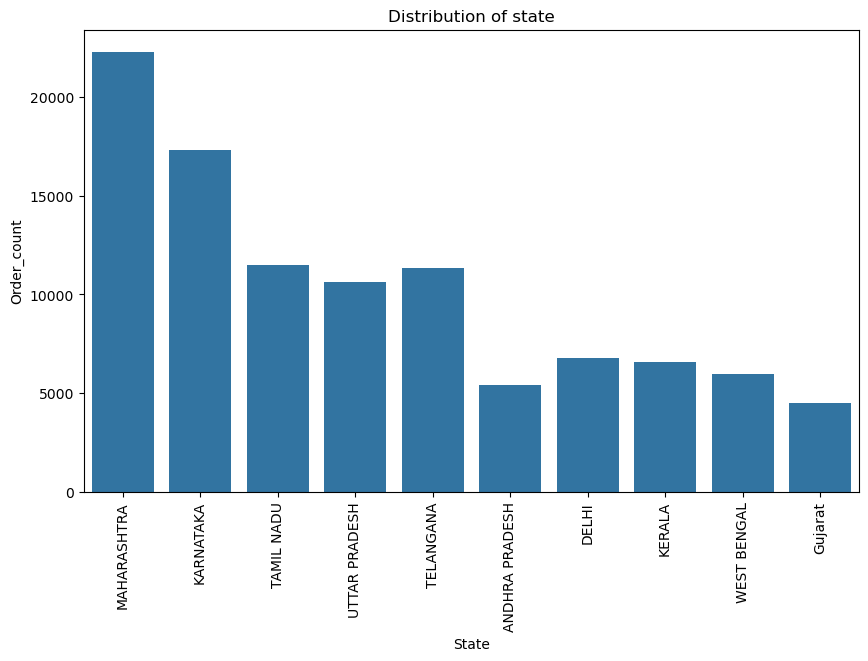

In [127]:
top10_state = df['ship-state'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['ship-state'].isin(top10_state.index)],x="ship-state")
plt.xlabel('State')
plt.ylabel('Order_count')
plt.title('Distribution of state')
plt.xticks(rotation = 90)
plt.show()

In [129]:
# most of the buyers are from maharashtra state

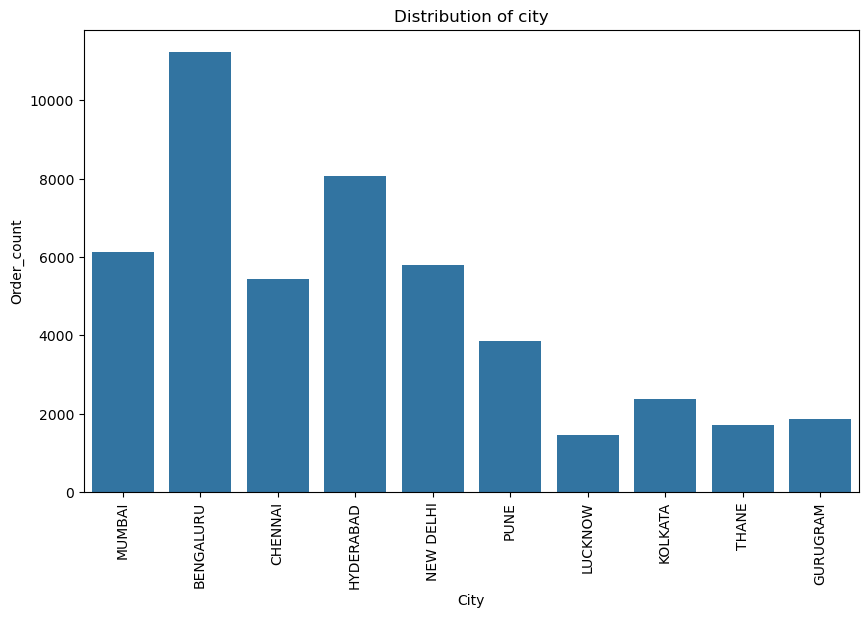

In [175]:
top10_state = df['ship-city'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['ship-city'].isin(top10_state.index)],x="ship-city")
plt.xlabel('City')
plt.ylabel('Order_count')
plt.title('Distribution of city')
plt.xticks(rotation = 90)
plt.show()

# Customer Segmentation

              Order ID  Amount  Qty     ship-state Spending Segment
0  171-0000547-8192359   301.0    1    MAHARASHTRA      Low Spender
1  171-0000902-4490745   544.0    1    WEST BENGAL   Medium Spender
2  171-0001409-6228339   422.0    1      TELANGANA      Low Spender
3  171-0003082-5110755   563.0    1  UTTAR PRADESH   Medium Spender
4  171-0003738-2052324   379.0    1  UTTAR PRADESH      Low Spender


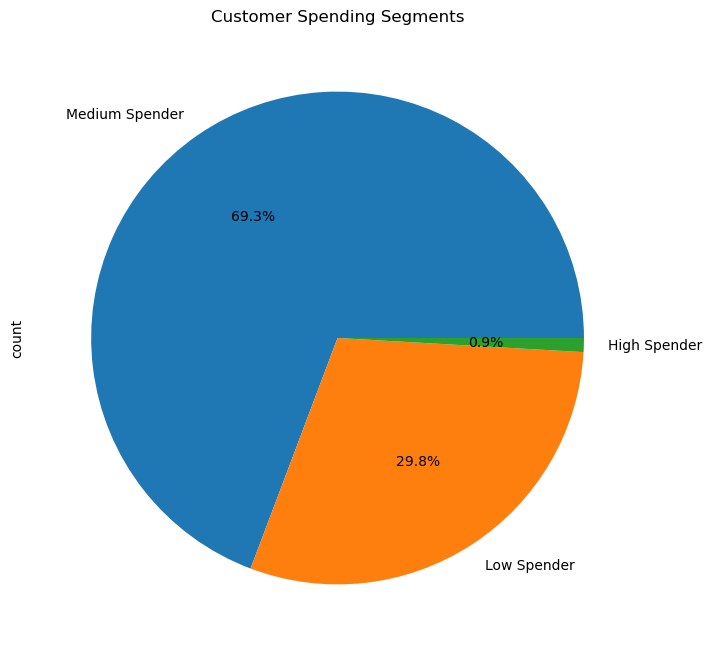

In [179]:
# Grouping data by customers (assuming 'Order ID' is unique per order)
customer_segments = df.groupby('Order ID').agg({
    'Amount': 'sum',   # Total sales amount
    'Qty': 'sum',      # Total quantity purchased
    'ship-state': 'first'  # Location (state)
}).reset_index()

# Classify customers based on their spending
customer_segments['Spending Segment'] = pd.cut(customer_segments['Amount'], 
                                                bins=[0, 500, 2000, float('inf')],
                                                labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Print customer segments
print(customer_segments.head())

# Visualize customer spending segments
customer_segments['Spending Segment'].value_counts().plot(kind='pie', 
                                                          autopct='%1.1f%%', 
                                                          figsize=(8, 8), 
                                                          title='Customer Spending Segments')
plt.show()


In [218]:
# 6. check b2b dtata

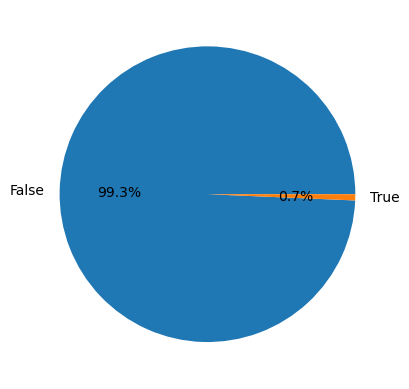

In [220]:
check_B2B =df['B2B'].value_counts()
plt.pie(check_B2B,labels=check_B2B.index,autopct='%1.1f%%')
plt.show()

In [ ]:
#  maximum 99.3% of buyers are retailers and 0.8% are wholesalers

#  Fullfillment Analysis

Fulfillment Method Counts:
 Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64
Fulfillment Performance by Service Level:
                     Total Quantity  Total Sales  Delivery Success Rate (%)
ship-service-level                                                        
Expedited                    83014  57858839.00                        0.0
Standard                     33632  25450331.25                        0.0


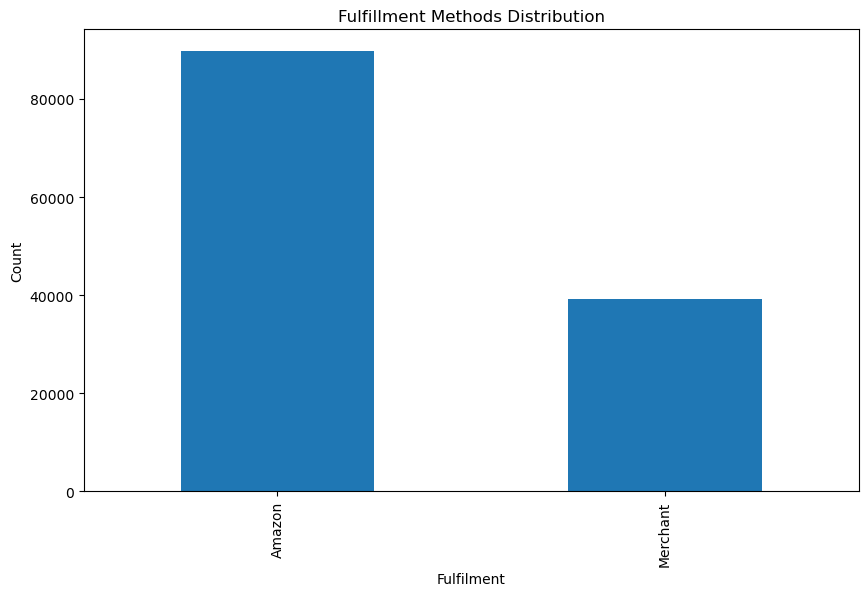

In [191]:
# Count of fulfillment methods
fulfillment_counts = df['Fulfilment'].value_counts()
print("Fulfillment Method Counts:\n", fulfillment_counts)

# Analyze fulfillment performance by delivery service level and courier status
fulfillment_performance = df.groupby('ship-service-level').agg({
    'Qty': 'sum',  # Total quantity fulfilled
    'Amount': 'sum',  # Total sales amount
    'Courier Status': lambda x: (x == 'Delivered').mean() * 100  # Percentage of successful deliveries
}).rename(columns={'Qty': 'Total Quantity', 'Amount': 'Total Sales', 'Courier Status': 'Delivery Success Rate (%)'})

print("Fulfillment Performance by Service Level:\n", fulfillment_performance)

# Visualize fulfillment methods
fulfillment_counts.plot(kind='bar', figsize=(10, 6), title='Fulfillment Methods Distribution')
plt.ylabel('Count')
plt.show()


